<a href="https://colab.research.google.com/github/jingyue-nancy-gao/Summer-Microcredential/blob/main/Final_Project_House_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## STEP #1: Problem Statement

The goal of this project is to make a house prices prediction model that can be used to predict house prices based on lots size, crime rate, distance to city, highway access, tax rates and other features. 

---



Data Set Information (Total 12 features):

* crime_rate: per capita crime rate
* big_lots_percent
* office_percent
* charles_river: whether the house/lot bounds river
* nitrous	
* avg_num_rooms: average number of rooms per dwelling	
* pre_1940: proportion of owner-occupied units built prior to 1940
* distance_to_city
* highway_access
* tax_rate: full-value property-tax rate for every $10,000
* student_teacher_ratio
* median_price: median value of homes
---





## STEP #2: Get the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
dataset = pd.read_csv('/content/drive/MyDrive/CUNY - MicroCredential/Final Project/housing_prices.csv')

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   crime_rate             506 non-null    float64
 1   big_lots_percent       506 non-null    float64
 2   office_percent         506 non-null    float64
 3   charles_river          506 non-null    float64
 4   nitrous                506 non-null    float64
 5   avg_num_rooms          506 non-null    float64
 6   pre_1940               506 non-null    float64
 7   distance_to_city       506 non-null    float64
 8   highway_access         506 non-null    float64
 9   tax_rate               506 non-null    float64
 10  student_teacher_ratio  506 non-null    float64
 11  median_price           506 non-null    float64
dtypes: float64(12)
memory usage: 47.6 KB


In [ ]:
dataset.head()

,crime_rate,big_lots_percent,office_percent,charles_river,nitrous,avg_num_rooms,pre_1940,distance_to_city,highway_access,tax_rate,student_teacher_ratio,median_price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,24000.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,21600.0
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,34700.0
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,33400.0
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,36200.0


In [ ]:
dataset.describe()

,crime_rate,big_lots_percent,office_percent,charles_river,nitrous,avg_num_rooms,pre_1940,distance_to_city,highway_access,tax_rate,student_teacher_ratio,median_price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,22532.806324
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,9197.104087
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,5000.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,17025.000000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,21200.000000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,25000.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,50000.000000


In [ ]:
dataset.isnull().value_counts()

crime_rate  big_lots_percent  office_percent  charles_river  nitrous  avg_num_rooms  pre_1940  distance_to_city  highway_access  tax_rate  student_teacher_ratio  median_price
False       False             False           False          False    False          False     False             False           False     False                  False           506
dtype: int64

## STEP #3: Exploratory Data Analysis / Visualizing the data

/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:1214: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


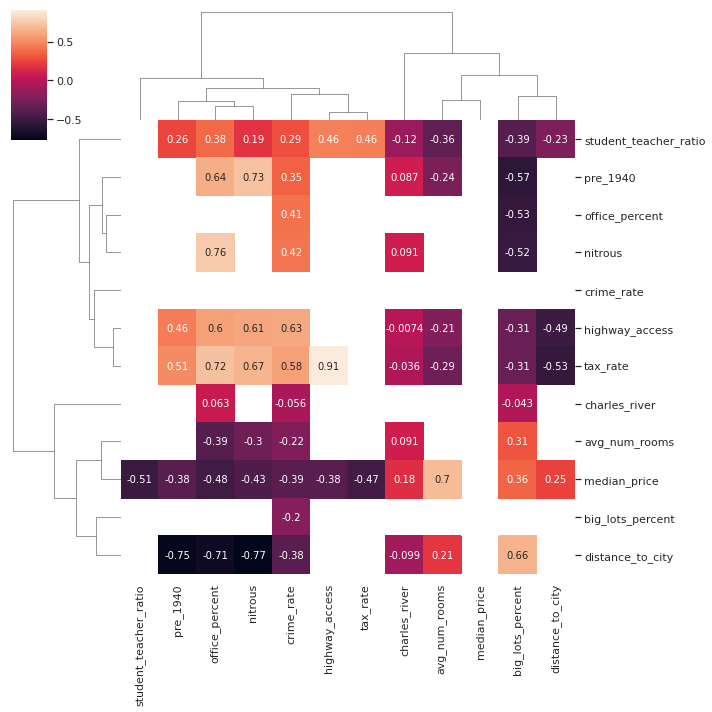

In [ ]:
corr = np.corrcoef(np.random.randn(10, 200))
mask = np.zeros_like(dataset.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
   sns.clustermap(dataset.corr(), annot=True, square=True, mask = mask)

---
Therefore, median_price are highly **positively** correlated with (r >= 0.45):
1.   avg_num_rooms (0.7)

median_price are highly **negatively** correlated with (r <= -0.45):
1.   student_teacher_ratio (-0.51)
2.   office_percent (-0.48)
3.   tax_rate (-0.47)

---



Which means:



1.   The median price will be **higher** if there is **more average number of rooms.**
2.   The median price will be **higher** if there is **less student/teacher ratio.**

---

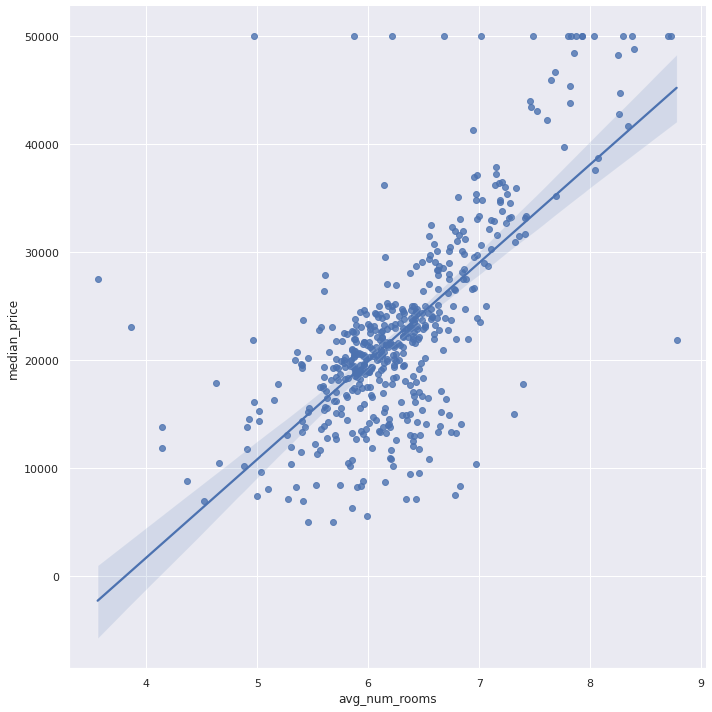

In [ ]:
sns.lmplot(data=dataset, x = "avg_num_rooms", y = "median_price", height = 10)

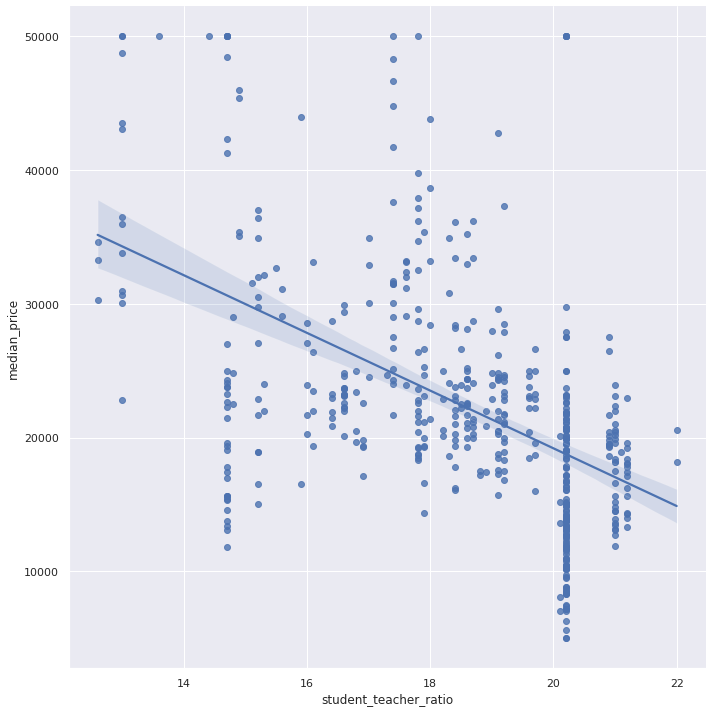

In [ ]:
sns.lmplot(data=dataset, x = "student_teacher_ratio", y = "median_price", height = 10)

Therefore, when predicting the median price, the Linear Regression might be acceptable because the model may find the best fit linear line between the independent and dependent variable. 

Specifically, it may helps to find the linear relationship between the the average house numbers of house (independent variable) and median price of house (dependent variable).


---



## STEP #4: Train Test Split

In [4]:
from sklearn.model_selection import train_test_split

## STEP #5: Training & Evaluate Models

5.0: Linear Regression Model

In [5]:
from sklearn.linear_model import LinearRegression

Taking only the selected two attributes from the dataset

(1) median price of the house and (2)avgerage number of rooms

In [6]:
df_LinearRegression_Binary_MP_ANR = dataset[['median_price', 'avg_num_rooms']]

In [7]:
X1 = np.array(df_LinearRegression_Binary_MP_ANR['avg_num_rooms']).reshape(-1, 1)

In [8]:
y1 = np.array(df_LinearRegression_Binary_MP_ANR['median_price']).reshape(-1, 1)

In [9]:
# Separating the data into independent and dependent variables
# Converting each dataframe into a numpy array
# since each dataframe contains only one column
df_LinearRegression_Binary_MP_ANR.dropna(inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [123]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.25)

In [124]:
# Splitting the data into training and testing data
regr = LinearRegression()

In [125]:
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

0.4155260591624351


In [42]:
# Splitting the data into training and testing data again to get another accuracy test result
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.25)
regr = LinearRegression()
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

0.6084120637376054


In [18]:
# Splitting the data into training and testing data again to get another accuracy test result
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.25)
regr = LinearRegression()
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

0.5513072376920252


In [90]:
# Splitting the data into training and testing data again to get another accuracy test result
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.25)
regr = LinearRegression()
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

0.6358026237952867


Visualizing the prediction for the split where the accurancy is 63.5803% (0.6358026237952867): 

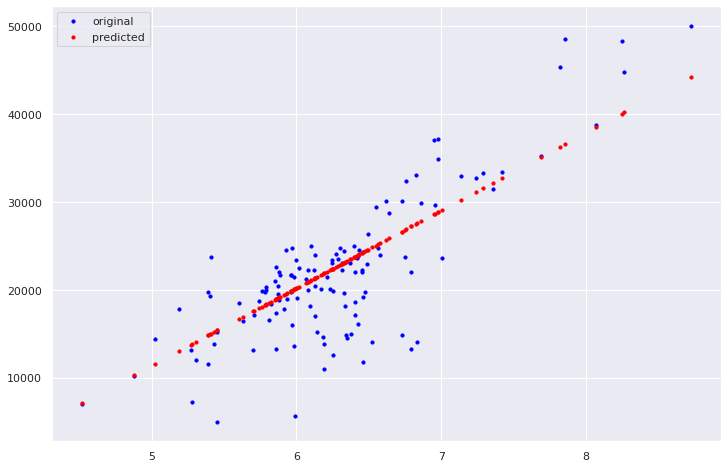

In [91]:
# Visualizing the predictions

plt.figure(figsize=(12,8))
y_pred = regr.predict(X_test)
plt.scatter(X_test, y_test, s = 10, color="blue", label="original")
plt.scatter(X_test, y_pred, s = 10, color="red", label="predicted")
plt.legend()
plt.show()

Basically, the accuracy of the model varies from 40% - 64%.  
Speciafically, after multiple splits of algorithm to increase the accuracy of the model from 41.5526% to 63.5803%

---

5.1: KNR Analytic Model

In [161]:
from sklearn.neighbors import KNeighborsRegressor

In [162]:
knr = KNeighborsRegressor(n_neighbors = 1)
print(knr)

KNeighborsRegressor(n_neighbors=1)


In [163]:
knr.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=1)

In [164]:
y_pred_knr = knr.predict(X_test)

In [165]:
from sklearn.metrics import classification_report, confusion_matrix

In [166]:
# check the model prediction accuracy.
knr_prediction_accuracy = knr.score(X_train, y_train)
print(knr_prediction_accuracy)

0.9295045262468443


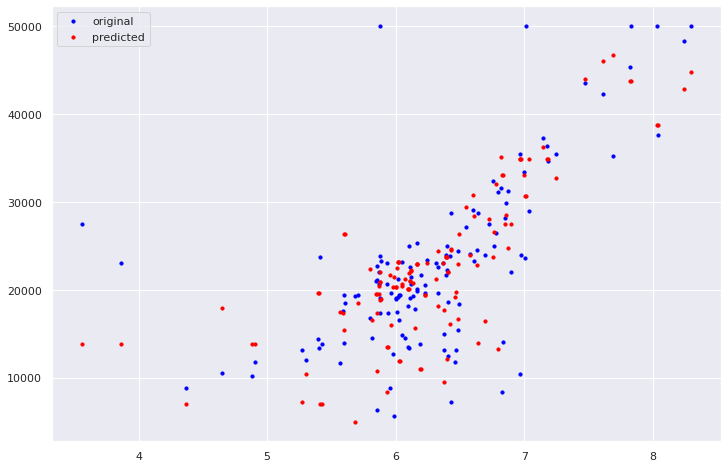

In [167]:
plt.figure(figsize=(12,8))
plt.scatter(X_test, y_test, s = 10, color="blue", label="original")
plt.scatter(X_test, y_pred_knr, s = 10, color="red", label="predicted")
plt.legend()
plt.show()

In [169]:
# Splitting the data into training and testing data again to get another accuracy test result

knr = KNeighborsRegressor(n_neighbors = 2)
print(knr)

knr.fit(X_train, y_train)
y_pred_knr = knr.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
# check the model prediction accuracy.
knr_prediction_accuracy = knr.score(X_train, y_train)
print(knr_prediction_accuracy)

KNeighborsRegressor(n_neighbors=2)
0.8125908675254805


In [170]:
# Splitting the data into training and testing data again to get another accuracy test result

knr = KNeighborsRegressor(n_neighbors = 3)
print(knr)

knr.fit(X_train, y_train)
y_pred_knr = knr.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
# check the model prediction accuracy.
knr_prediction_accuracy = knr.score(X_train, y_train)
print(knr_prediction_accuracy)

KNeighborsRegressor(n_neighbors=3)
0.741233844240045


In [168]:
# Splitting the data into training and testing data again to get another accuracy test result

knr = KNeighborsRegressor(n_neighbors = 4)
print(knr)

knr.fit(X_train, y_train)
y_pred_knr = knr.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
# check the model prediction accuracy.
knr_prediction_accuracy = knr.score(X_train, y_train)
print(knr_prediction_accuracy)

KNeighborsRegressor(n_neighbors=4)
0.705974377240292


Basically, the accuracy of the model varies from 70% - 93%.  
For conducting the KNeighborsRegressor, When changing number of neighbors, splitting the data into new training and testing data set, the accuracy decreased from 92.9505% to 70.5974%. 

The best accuracy of the KNeighborsRegressor model existes when k = 1, where accuracy equals to 92.9504%. 

---

## Conclusion

After analyzing the data, including but not limited to based on lot size, crime rate, distance to city, highway access, tax rates, and other features, this project created a house prices prediction model.

Based on the correlation heatmap, this project nominated two critical correlated independent variables: (1) average number of rooms and (2) student/teacher ratio. After selections, the project mainly focused on the relationship between the average number of rooms and the median house price. The median price will be higher if there is a large average number of rooms.

Then, the project tested using the Linear Regression Model and KNR Analytic Model to predict house prices based on the average number of rooms. Compared to the Linear Regression Model, which accuracy of the model varies from 40% - 64%, the KNR Analytic Model has higher accuracy, which varies from 70% - 93%.